### TASK1

#### UNEMPLOYMENT IN INDIA

• Unemployment is measured by the unemployment rate which is the number of
people who are unemployed as a percentage of the total labour force.

• We have seen a sharp increase in the unemployment rate during Covid-19,

• so analyzing the unemployment rate can be a good data science project.

###  imporing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### loading data 

In [2]:
unemployment_india=pd.read_csv("Unemployment in India.csv")

In [3]:
unemployment_rate = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

### shapes of datasets

In [4]:
unemployment_india.shape

(768, 7)

In [5]:
unemployment_rate.shape

(267, 9)

### checking the data

In [6]:
unemployment_india.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [7]:
unemployment_rate.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [8]:
unemployment_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [9]:
unemployment_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


### converting column names to lowercase

In [10]:
unemployment_india.columns=unemployment_india.columns.str.strip().str.lower()
unemployment_india.columns

Index(['region', 'date', 'frequency', 'estimated unemployment rate (%)',
       'estimated employed', 'estimated labour participation rate (%)',
       'area'],
      dtype='object')

In [11]:
unemployment_rate.columns=unemployment_rate.columns.str.strip().str.lower()
unemployment_rate.columns

Index(['region', 'date', 'frequency', 'estimated unemployment rate (%)',
       'estimated employed', 'estimated labour participation rate (%)',
       'region.1', 'longitude', 'latitude'],
      dtype='object')

### checking duplicates and null values

In [12]:
unemployment_india=unemployment_india.drop_duplicates()
unemployment_india.duplicated().sum()

0

In [13]:
unemployment_india = unemployment_india.copy()
unemployment_india.dropna(inplace=True)

In [14]:
unemployment_india.shape

(740, 7)

In [15]:
unemployment_rate=unemployment_rate.drop_duplicates()
unemployment_rate.duplicated().sum()

0

In [16]:
unemployment_rate = unemployment_rate.copy()
unemployment_rate.dropna(inplace=True)

In [17]:
unemployment_rate.shape   ### no null values

(267, 9)

### converting datatype of "date" column to datatime

In [18]:
unemployment_india["date"] = pd.to_datetime(unemployment_india["date"],dayfirst=True)

In [19]:
unemployment_rate["date"] = pd.to_datetime(unemployment_rate["date"],dayfirst=True)

In [20]:
unemployment_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   region                                   267 non-null    object        
 1   date                                     267 non-null    datetime64[ns]
 2   frequency                                267 non-null    object        
 3   estimated unemployment rate (%)          267 non-null    float64       
 4   estimated employed                       267 non-null    int64         
 5   estimated labour participation rate (%)  267 non-null    float64       
 6   region.1                                 267 non-null    object        
 7   longitude                                267 non-null    float64       
 8   latitude                                 267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), 

In [21]:
unemployment_india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   region                                   740 non-null    object        
 1   date                                     740 non-null    datetime64[ns]
 2   frequency                                740 non-null    object        
 3   estimated unemployment rate (%)          740 non-null    float64       
 4   estimated employed                       740 non-null    float64       
 5   estimated labour participation rate (%)  740 non-null    float64       
 6   area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


Unemployment is measured by the unemployment rate which is the number of
people who are unemployed as a percentage of the total labour force.


In [22]:
unemployment_india["frequency"]=unemployment_india["frequency"].str.replace("Monthly","M")

In [23]:
unemployment_india.head()

,region,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),area
0,Andhra Pradesh,2019-05-31,M,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,M,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,M,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,M,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,M,5.17,12256762.0,44.68,Rural


In [24]:
df=pd.concat([unemployment_india,unemployment_rate], ignore_index=True)
df

,region,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),area,region.1,longitude,latitude
0,Andhra Pradesh,2019-05-31,M,3.65,11999139.0,43.24,Rural,NaN,NaN,NaN
1,Andhra Pradesh,2019-06-30,M,3.05,11755881.0,42.05,Rural,NaN,NaN,NaN
2,Andhra Pradesh,2019-07-31,M,3.75,12086707.0,43.50,Rural,NaN,NaN,NaN
3,Andhra Pradesh,2019-08-31,M,3.32,12285693.0,43.97,Rural,NaN,NaN,NaN
4,Andhra Pradesh,2019-09-30,M,5.17,12256762.0,44.68,Rural,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1002,West Bengal,2020-06-30,M,7.29,30726310.0,40.39,NaN,East,22.9868,87.855
1003,West Bengal,2020-07-31,M,6.83,35372506.0,46.17,NaN,East,22.9868,87.855
1004,West Bengal,2020-08-31,M,14.87,33298644.0,47.48,NaN,East,22.9868,87.855
1005,West Bengal,2020-09-30,M,9.35,35707239.0,47.73,NaN,East,22.9868,87.855


In [25]:
df["frequency"]=df["frequency"].str.replace(" M","M")

In [26]:
df["frequency"].value_counts()

M    1007
Name: frequency, dtype: int64

In [27]:
df['unemployment']= (df['estimated unemployment rate (%)']/df['estimated labour participation rate (%)'])*100
df['unemployment']

0        8.441258
1        7.253270
2        8.620690
3        7.550603
4       11.571173
          ...    
1002    18.049022
1003    14.793156
1004    31.318450
1005    19.589357
1006    21.871576
Name: unemployment, Length: 1007, dtype: float64

In [28]:
df.isna().sum()

region                                       0
date                                         0
frequency                                    0
estimated unemployment rate (%)              0
estimated employed                           0
estimated labour participation rate (%)      0
area                                       267
region.1                                   740
longitude                                  740
latitude                                   740
unemployment                                 0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [30]:
df.shape

(1007, 11)

In [31]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [32]:
discrete_df = df.select_dtypes(include=['object'])
discrete_univariate_analysis(discrete_df)

********** region **********
count                                                   1007
nunique                                                   28
unique     [Andhra Pradesh, Assam, Bihar, Chhattisgarh, D...
Name: region, dtype: object
Value Counts: 
 Andhra Pradesh      38
Kerala              38
West Bengal         38
Uttar Pradesh       38
Tripura             38
Telangana           38
Tamil Nadu          38
Rajasthan           38
Punjab              38
Odisha              38
Madhya Pradesh      38
Maharashtra         38
Karnataka           38
Jharkhand           38
Himachal Pradesh    38
Haryana             38
Gujarat             38
Delhi               38
Chhattisgarh        38
Bihar               38
Meghalaya           37
Uttarakhand         37
Assam               36
Puducherry          36
Goa                 34
Jammu & Kashmir     30
Sikkim              25
Chandigarh          12
Name: region, dtype: int64

********** frequency **********
count      1007
nunique       1
unique  

In [33]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['count', 'min', 'max', 'mean', 'median', 'std', 'skew']))
        print()

In [34]:
numerical_df =df.select_dtypes(include=['float64','int64'])
numerical_univariate_analysis(numerical_df)

********** estimated unemployment rate (%) **********
count     1007.000000
min          0.000000
max         76.740000
mean        11.906991
median       8.890000
std         10.739549
skew         2.215631
Name: estimated unemployment rate (%), dtype: float64

********** estimated employed **********
count     1.007000e+03
min       4.942000e+04
max       5.943376e+07
mean      8.996209e+06
median    5.543380e+06
std       1.020784e+07
skew      1.998273e+00
Name: estimated employed, dtype: float64

********** estimated labour participation rate (%) **********
count     1007.000000
min         13.330000
max         72.570000
mean        42.378620
median      40.880000
std          8.048542
skew         1.016958
Name: estimated labour participation rate (%), dtype: float64

********** longitude **********
count     267.000000
min        10.850500
max        33.778200
mean       22.826048
median     23.610200
std         6.270731
skew       -0.382344
Name: longitude, dtype: float64

**

In [35]:
df.head(20)

,region,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),area,region.1,longitude,latitude,unemployment
0,Andhra Pradesh,2019-05-31,M,3.65,11999139.0,43.24,Rural,NaN,NaN,NaN,8.441258
1,Andhra Pradesh,2019-06-30,M,3.05,11755881.0,42.05,Rural,NaN,NaN,NaN,7.253270
2,Andhra Pradesh,2019-07-31,M,3.75,12086707.0,43.50,Rural,NaN,NaN,NaN,8.620690
3,Andhra Pradesh,2019-08-31,M,3.32,12285693.0,43.97,Rural,NaN,NaN,NaN,7.550603
4,Andhra Pradesh,2019-09-30,M,5.17,12256762.0,44.68,Rural,NaN,NaN,NaN,11.571173
5,Andhra Pradesh,2019-10-31,M,3.52,12017412.0,43.01,Rural,NaN,NaN,NaN,8.184143
6,Andhra Pradesh,2019-11-30,M,4.12,11397681.0,41.00,Rural,NaN,NaN,NaN,10.048780
7,Andhra Pradesh,2019-12-31,M,4.38,12528395.0,45.14,Rural,NaN,NaN,NaN,9.703146
8,Andhra Pradesh,2020-01-31,M,4.84,12016676.0,43.46,Rural,NaN,NaN,NaN,11.136677
9,Andhra Pradesh,2020-02-29,M,5.91,11723617.0,42.83,Rural,NaN,NaN,NaN,13.798739


In [36]:
unemp_mean = df.groupby('region')['estimated unemployment rate (%)'].mean().sort_values(ascending=False)
unemp_mean

region
Tripura             27.483158
Haryana             26.597368
Jharkhand           20.309737
Bihar               19.063684
Himachal Pradesh    17.888947
Delhi               17.000263
Jammu & Kashmir     16.275333
Chandigarh          15.991667
Rajasthan           14.534474
Puducherry          12.361389
Punjab              12.017895
Uttar Pradesh       11.810789
Goa                 10.125000
Tamil Nadu          10.048158
Kerala               9.942368
Chhattisgarh         8.866316
West Bengal          8.668684
Sikkim               8.063200
Uttarakhand          7.818919
Andhra Pradesh       7.789474
Maharashtra          7.668421
Telangana            7.499737
Madhya Pradesh       7.261053
Karnataka            6.937105
Gujarat              6.588158
Assam                5.991389
Odisha               5.869474
Meghalaya            4.546757
Name: estimated unemployment rate (%), dtype: float64

<Axes: ylabel='region'>

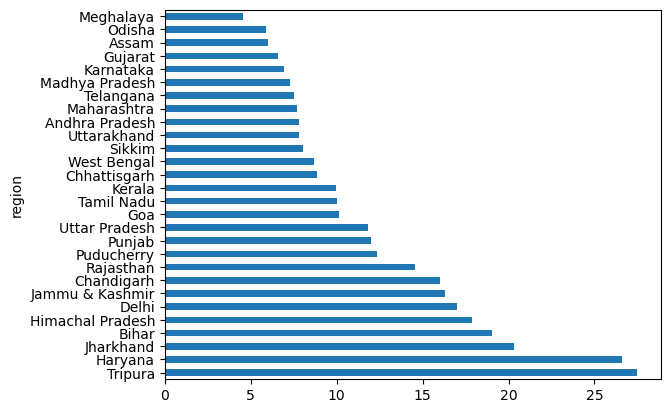

In [37]:
unemp_mean.plot(kind='barh')

In [38]:
unemp1_mean = df.groupby('region')['unemployment'].mean().sort_values(ascending=False)
unemp1_mean

region
Haryana             62.920251
Bihar               50.519183
Jharkhand           50.111938
Delhi               47.442728
Tripura             45.374517
Jammu & Kashmir     40.559708
Chandigarh          40.291544
Himachal Pradesh    39.836917
Rajasthan           36.848527
Puducherry          33.633724
Tamil Nadu          32.200083
Kerala              32.027223
Uttar Pradesh       30.124629
Punjab              29.395505
Goa                 25.265980
Uttarakhand         23.222464
Chhattisgarh        22.289849
Andhra Pradesh      21.683918
West Bengal         19.646170
Maharashtra         19.633460
Madhya Pradesh      19.172526
Odisha              17.522107
Sikkim              16.983050
Karnataka           16.230732
Gujarat             15.581904
Telangana           15.028215
Assam               13.805033
Meghalaya            8.932964
Name: unemployment, dtype: float64

<Axes: ylabel='region'>

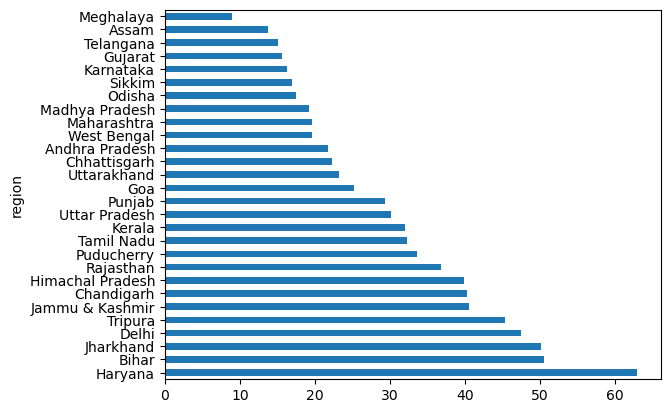

In [39]:
unemp1_mean.plot(kind='barh')

In [40]:
labour_mean = df.groupby('region')['estimated labour participation rate (%)'].mean().sort_values(ascending=False)
labour_mean

region
Tripura             60.777632
Meghalaya           57.831622
Telangana           53.520789
Sikkim              45.969600
Gujarat             45.940263
West Bengal         45.349211
Assam               44.487778
Himachal Pradesh    43.177368
Haryana             42.569474
Chhattisgarh        42.376579
Maharashtra         42.082895
Karnataka           41.517632
Jharkhand           41.324737
Punjab              40.833158
Rajasthan           40.135789
Jammu & Kashmir     40.090000
Tamil Nadu          39.953947
Chandigarh          39.336667
Andhra Pradesh      39.266842
Goa                 39.247353
Uttar Pradesh       38.952368
Madhya Pradesh      38.848947
Odisha              38.616316
Puducherry          38.138611
Delhi               38.121053
Bihar               37.895789
Kerala              34.476842
Uttarakhand         34.176486
Name: estimated labour participation rate (%), dtype: float64

<Axes: xlabel='region'>

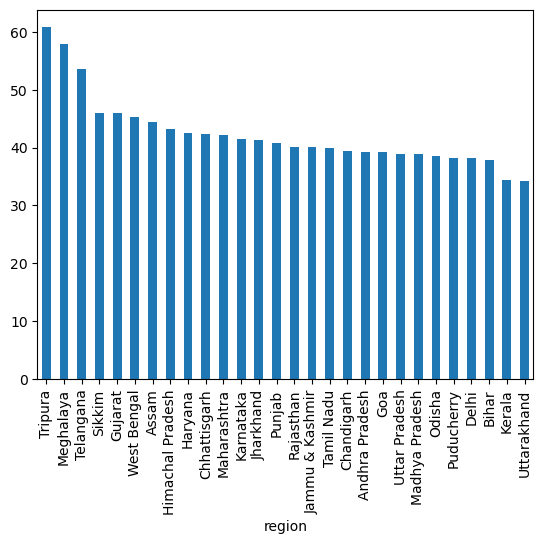

In [41]:
labour_mean.plot(kind='bar')

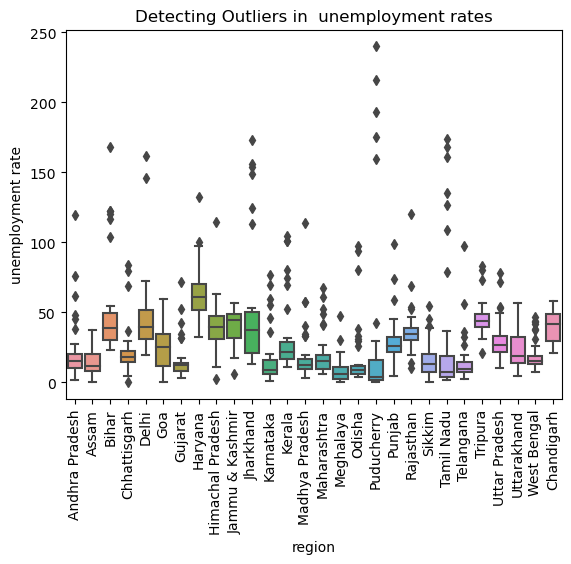

In [42]:
sns.boxplot(data=df,x='region',y='unemployment')
plt.title('Detecting Outliers in  unemployment rates')
plt.ylabel("unemployment rate")
plt.xlabel("region")
plt.xticks(rotation = 90)
plt.show()

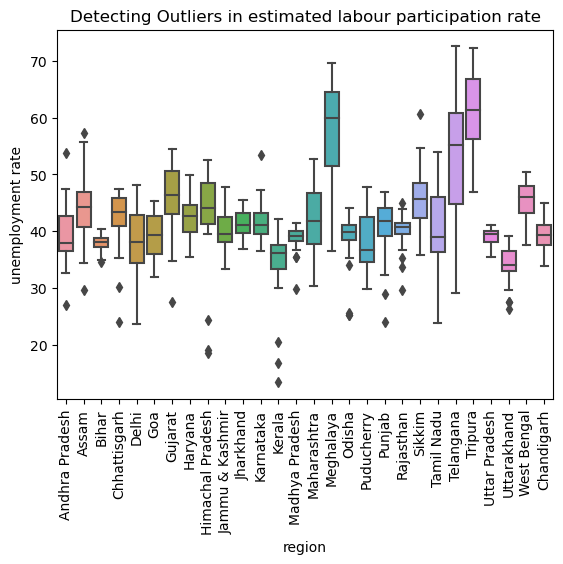

In [43]:
sns.boxplot(data=df,x='region',y='estimated labour participation rate (%)')
plt.title('Detecting Outliers in estimated labour participation rate')
plt.ylabel("unemployment rate")
plt.xlabel("region")
plt.xticks(rotation = 90)
plt.show()

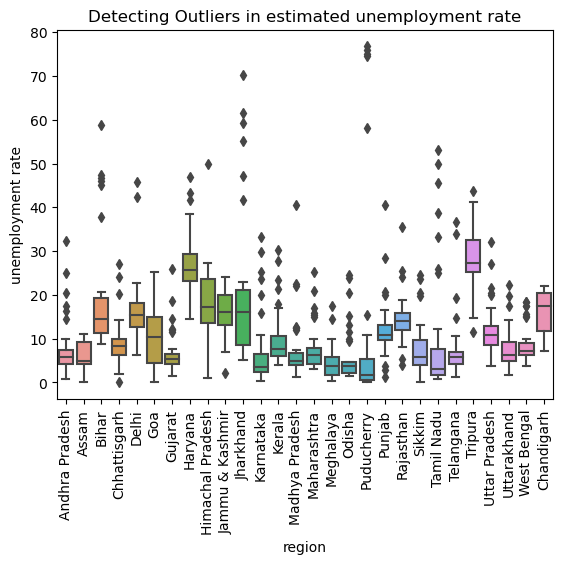

In [44]:
sns.boxplot(data=df,x='region',y='estimated unemployment rate (%)')
plt.title('Detecting Outliers in estimated unemployment rate')
plt.ylabel("unemployment rate")
plt.xlabel("region")
plt.xticks(rotation = 90)
plt.show()

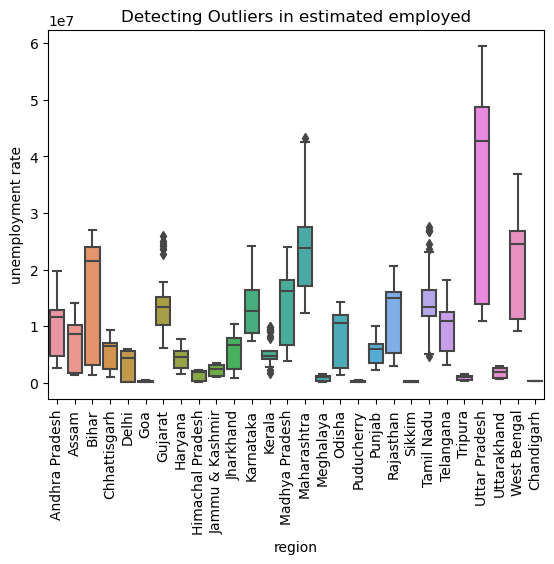

In [45]:
sns.boxplot(data=df,x='region',y='estimated employed')
plt.title('Detecting Outliers in estimated employed')
plt.ylabel("unemployment rate")
plt.xlabel("region")
plt.xticks(rotation = 90)
plt.show()

In [46]:
df['year'] = df['date'].dt.year

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   region                                   1007 non-null   object        
 1   date                                     1007 non-null   datetime64[ns]
 2   frequency                                1007 non-null   object        
 3   estimated unemployment rate (%)          1007 non-null   float64       
 4   estimated employed                       1007 non-null   float64       
 5   estimated labour participation rate (%)  1007 non-null   float64       
 6   area                                     740 non-null    object        
 7   region.1                                 267 non-null    object        
 8   longitude                                267 non-null    float64       
 9   latitude                                 

In [48]:
df['year'] = pd.to_datetime(df['year'],dayfirst=True)

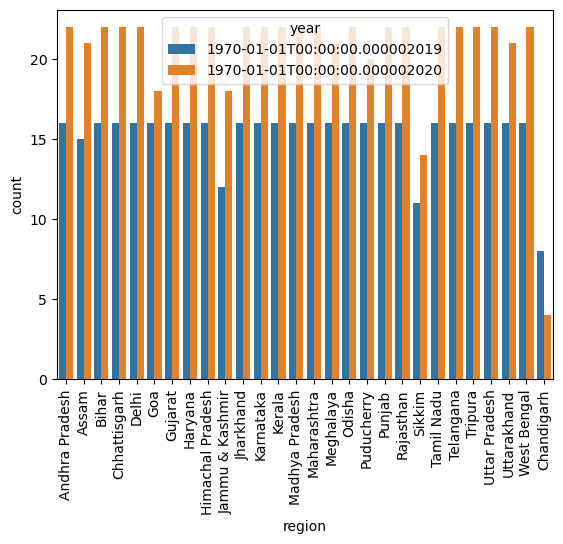

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'datetime_column' is your datetime column and 'category_column' is your categorical column
sns.countplot(x='region', hue='year', data=df)
plt.xticks(rotation= 90)
plt.show()


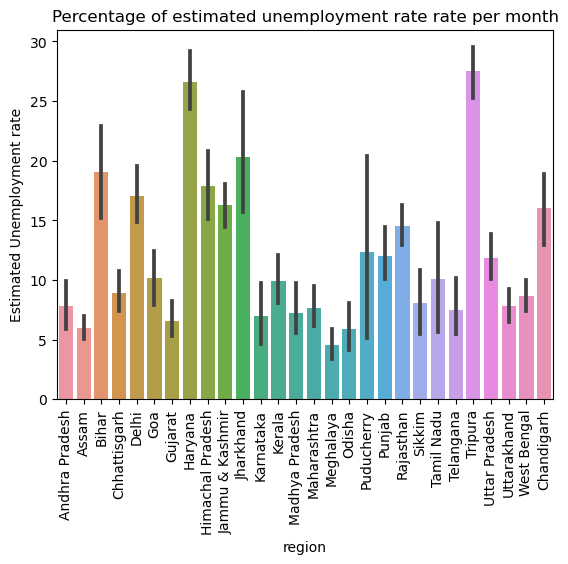

In [50]:
sns.barplot(data=df, x='region', y='estimated unemployment rate (%)')
plt.title('Percentage of estimated unemployment rate rate per month')
plt.ylabel('Estimated Unemployment rate')
plt.xticks(rotation= 90)
plt.show()